# Introduction

Every 2 years top athletes are put to the ultimate test - competing at the Olympics amongst their highest competitors. Notoriously, new-talent athletes are introduced at this international event, and winning a medal solidifies their credibility as a top performer (Horne, 2016).

According to Apollaro et al, younger athletes tend to show more success in sports such as taekwondo, due to their physical strength and weight (Apollaro, 2022). However, studies such as by Ford and Williams have demonstrated through experimentation that higher skill level that comes with age contributes to more awards in sports such as soccer (Ford, 2013) or skiing.
This leads us to our question: Across the summer and winter Olympics, is there a difference between the mean age of first-time Olympic medal winners? 

Based on our research, we predict that there will be a difference in mean age for first-time winners. Furthermore, we predict that Winter Olympic athletes will have an older mean age correlating with their higher skill level. This is because Winter Olympic events generally put more emphasis on long-term skill than physical capabilities that come with youth, which we believe would be a competitive advantage, thus skewing the Winter Olympic data towards older athletes (Ford, 2013). 

To conduct this analysis, we will be filtering our dataset of winter and summer Olympic medallists to ensure we only count the age of their debut win towards the mean of the sample population using age, season, and medals. Additionally, we will be using standard deviation as our scale parameter. We will be generalizing age across sports and genders, and assuming that the age of peak performance is similar in all of them. This is because we aim to find the mean age of the average Olympian, regardless of the sport they’re associated with. We hypothesize that due to extraneous demands and reliance on the environment in winter sports, the skill and mental and physical strengths of older athletes will prove more advantageous in the winter compared to the summer. In other words, we believe that there will be a difference between the mean age of first-time medal winners across the Winter and Summer Olympics.

# Methods

### Load Libraries

In [1]:
## code to get rid of warnings
defaultW <- getOption("warn") 
options(warn = -1) 
##

suppressPackageStartupMessages(library(tidyverse))
library(repr)
library(digest)
library(infer)
library(broom)
suppressPackageStartupMessages(library(gridExtra))
library(cowplot)
source("R/plotting.R")
source("R/display.R")

### Data Intake and Pre-Processing

First, we will read the dataset. The code here assumes you've downloaded the dataset and placed them into a data folder. If you would like to run our code and follow along, please clone our GitHub repository  [here](https://github.com/KevinSaigon/stat-201-project)

In [2]:
data <- read.csv(file = "data/athlete_events.csv")

We will then do some pre-processing to get rid of any athlete whose age is not known as well as filter out ones who did not win any medals.

The next step is then to only count first-time wins for multiple-time medal winners (i.e Michael Phelps). The code below essentially only keeps the first occurrence of an athlete's ID, and since we sorted the data frame by Year, this equates to the athlete's first time winning the any medal.

In [3]:
processed_df <- data[order(data$Year),]  %>% 
    filter(!is.na(Age)) %>%    # get rid of NA/Age
    filter(!is.na(Medal)) %>%  # get rid of anyone who didn't win a medal either
    subset(select = c(ID, Name, Age, Season, Medal))

first_time_only <- processed_df[match(unique(processed_df$ID), processed_df$ID),] # only first time winners now, if they won a second time, it was excluded
    
head(first_time_only)
cat("Table 1: Original dataset (first few examples)")

,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,12068,Arthur Charles Blake,24,Summer,Silver
2,12563,Conrad Helmut Fritz Bcker,25,Summer,Gold
4,12929,John Mary Pius Boland,25,Summer,Gold
6,16616,"Thomas Edmund ""Tom"" Burke",21,Summer,Gold
8,17492,Eugne Henri Callot,20,Summer,Silver
9,18785,Demetrius Emmanuel Casdagli,23,Summer,Silver


Table 1: Original dataset (first few examples)

Next, we will split the data set by their Season, the Winter Olympics vs the Summer Olympics.

In [4]:
winter_df <- first_time_only %>% 
    filter(Season == "Winter")

summer_df <- first_time_only %>% 
    filter(Season == "Summer")

head(winter_df)
cat("Table 2.1: Winter dataframe (first few examples)\n\n")
cat(c("Number of Examples:", nrow(winter_df)), "\n\n")

head(summer_df)
cat("Table 2.2: Summer dataframe (first few examples)\n\n")
cat(c("Number of Examples:", nrow(summer_df)))


,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,391,Clarence John Abel,23,Winter,Silver
2,1341,Johan Petter hln (Andersson-),44,Winter,Silver
3,3872,William Harding Anderson,22,Winter,Bronze
4,4060,Georges Jules Andr,47,Winter,Bronze
5,5232,Thomas Alfred Arnold,22,Winter,Silver
6,5932,Alfred Aufdenblatten,26,Winter,Gold


Table 2.1: Winter dataframe (first few examples)

Number of Examples: 3658 



,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,12068,Arthur Charles Blake,24,Summer,Silver
2,12563,Conrad Helmut Fritz Bcker,25,Summer,Gold
3,12929,John Mary Pius Boland,25,Summer,Gold
4,16616,"Thomas Edmund ""Tom"" Burke",21,Summer,Gold
5,17492,Eugne Henri Callot,20,Summer,Silver
6,18785,Demetrius Emmanuel Casdagli,23,Summer,Silver


Table 2.2: Summer dataframe (first few examples)

Number of Examples: 23949

### Calculations 

If we are assuming that this dataset is 100% accurate and thus represents the entire population of all Olympic participants, then we could consider the dataset a population, and thus uncertainty would be 0%. However, in reality, if we were trying to gather this dataset ourselves, it is extremely unlikely as well as unfeasible to collect so many data points. Realistically, we would take a sample of this population, so we will take an initial sample of 1000.

In [5]:
set.seed(42069)

winter_sample <- winter_df %>% 
    rep_sample_n(size = 1000, reps = 1) %>% 
    subset(select = -(replicate))

summer_sample <- summer_df %>% 
    rep_sample_n(size = 1000, reps = 1) %>% 
    subset(select = -(replicate))

head(winter_sample)
cat("Table 3.1: Winter sample (first few examples)\n\n")
head(summer_sample)
cat("Table 3.2: Summer sample (first few examples)")

ID,Name,Age,Season,Medal
<int>,<chr>,<int>,<chr>,<chr>
85481,Michael Neumayer,31,Winter,Silver
25759,Vitaly Semyonovich Davydov,24,Winter,Gold
3951,Lina Marie Andersson,24,Winter,Gold
44916,Veikko Johannes Hakulinen,27,Winter,Gold
42073,Amlie Goulet-Nadon,19,Winter,Bronze
49094,Lukas Hofer,24,Winter,Bronze


Table 3.1: Winter sample (first few examples)



ID,Name,Age,Season,Medal
<int>,<chr>,<int>,<chr>,<chr>
30312,Konstantin Dubrovin,19,Summer,Bronze
103786,"Matthew ""Matt"" Ryan",24,Summer,Silver
92507,Christie Patricia Pearce-Rampone,25,Summer,Silver
105068,"Robert Lewis ""Bob"" Samuelson",25,Summer,Bronze
39803,Atanas Ivanov Gerov,23,Summer,Silver
99838,Walter Reisp,25,Summer,Silver


Table 3.2: Summer sample (first few examples)

From this, we can calculate our estimates of the mean for each season

In [6]:
winter_mean_estimate <- mean(winter_sample$Age)
summer_mean_estimate <- mean(summer_sample$Age)

cat("Winter Mean Estimate:", winter_mean_estimate, "\nSummer Mean Estimate:", summer_mean_estimate)

Winter Mean Estimate: 25.165 
Summer Mean Estimate: 25.078

### Sampling

Then, we'll perform bootstrapping or resampling with replacement for uncertainty calculations later on.

In [7]:
set.seed(42069)

winter_bootstrap <- winter_sample %>% 
    rep_sample_n(size = 1000, reps = 200, replace = TRUE)

summer_bootstrap <- summer_sample %>% 
    rep_sample_n(size = 1000, reps = 200, replace = TRUE)

head(summer_bootstrap, 5)
cat("Table 4.1: Preview of Summer Bootstrap sample\n\n")
head(winter_bootstrap, 5)
cat("Table 4.2: Preview of Winter Bootstrap sample")

replicate,ID,Name,Age,Season,Medal
<int>,<int>,<chr>,<int>,<chr>,<chr>
1,59251,Ilias Khatzipavlis,23,Summer,Silver
1,26210,"Regina Constance ""Reggie"" de Jong",16,Summer,Bronze
1,63441,Andriy Kovalenko,21,Summer,Bronze
1,33767,Otto Fahr,19,Summer,Silver
1,69088,Melanie Leupolz,22,Summer,Gold


Table 4.1: Preview of Summer Bootstrap sample



replicate,ID,Name,Age,Season,Medal
<int>,<int>,<chr>,<int>,<chr>,<chr>
1,71036,"James ""Jim"" Logan",22,Winter,Bronze
1,28397,"Judith Anne ""Judy"" Diduck",31,Winter,Silver
1,61583,"Deborah ""Debbie"" Knox",33,Winter,Gold
1,62905,Lisbeth Korsmo-Berg,28,Winter,Bronze
1,91845,Gabriella Paruzzi,22,Winter,Bronze


Table 4.2: Preview of Winter Bootstrap sample

Now, we will calculate the sample mean for each sample.

Table 5: Sample of Mean age for Winter and Summer Olympic (first 17 examples)

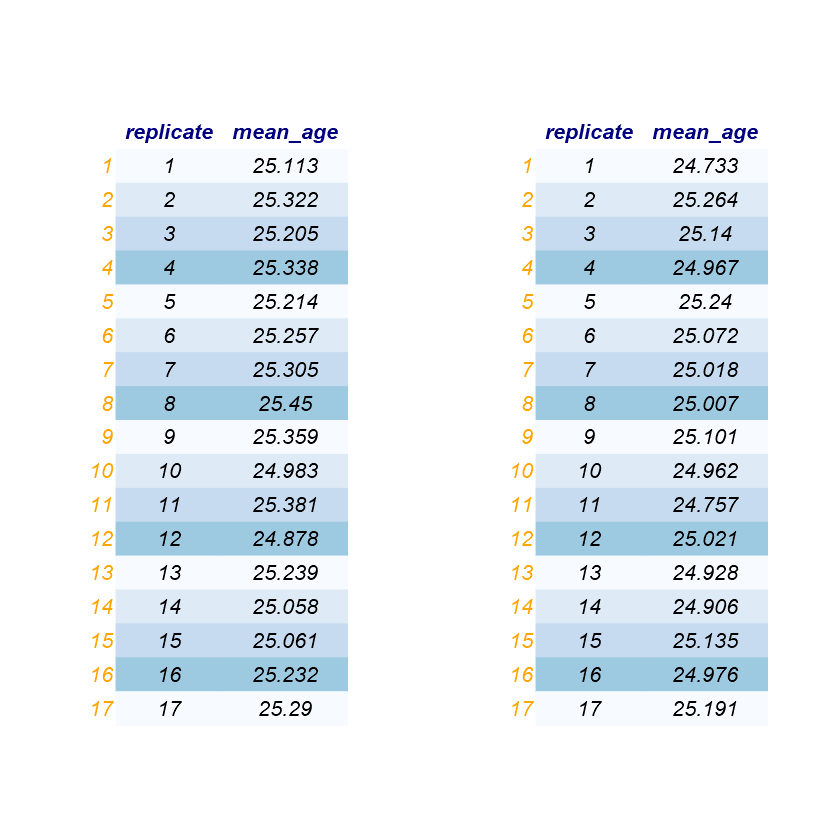

In [8]:
winter_resampled_means <- winter_bootstrap %>% 
    group_by(replicate) %>% 
    summarize(mean_age = mean(Age))

summer_resampled_means <- summer_bootstrap %>% 
    group_by(replicate) %>% 
    summarize(mean_age = mean(Age))

df_list = list(head(winter_resampled_means, 17), head(summer_resampled_means, 17))
table_render(df_list)
cat("Table 5: Sample of Mean age for Winter and Summer Olympic (first 17 examples)")

### Visualizations

Let's first remind ourselves of our calculated estimates.

In [9]:
name <- c("Winter Mean Estimate", "Summer Mean Estimate")
values <- c(winter_mean_estimate, summer_mean_estimate)

tab <- data.frame(name, values)
tab
cat("Table 6: Mean for each season of our original sample")

name,values
<chr>,<dbl>
Winter Mean Estimate,25.165
Summer Mean Estimate,25.078


Table 6: Mean for each season of our original sample

In [10]:
winter_hist <- plot_histogram(winter_resampled_means, "mean_age", 0.1, TRUE) + 
    geom_vline(xintercept = winter_mean_estimate, color = "blue") + 
    labs(x="Mean Age", title="Bootstrap distribution of Mean Age for Winter Olympics", caption="Figure 1.1") +
    theme(plot.caption = element_text(size = 17, hjust=0.5))


In [11]:
summer_hist <- plot_histogram(summer_resampled_means, "mean_age", 0.1, TRUE) +
    geom_vline(xintercept = summer_mean_estimate, color = "blue") +
    labs(x="Mean Age", title="Bootstrap distribution of Mean Age for Summer Olympics", caption="Figure 1.2") +
    theme(plot.caption = element_text(size = 17, hjust=0.5))

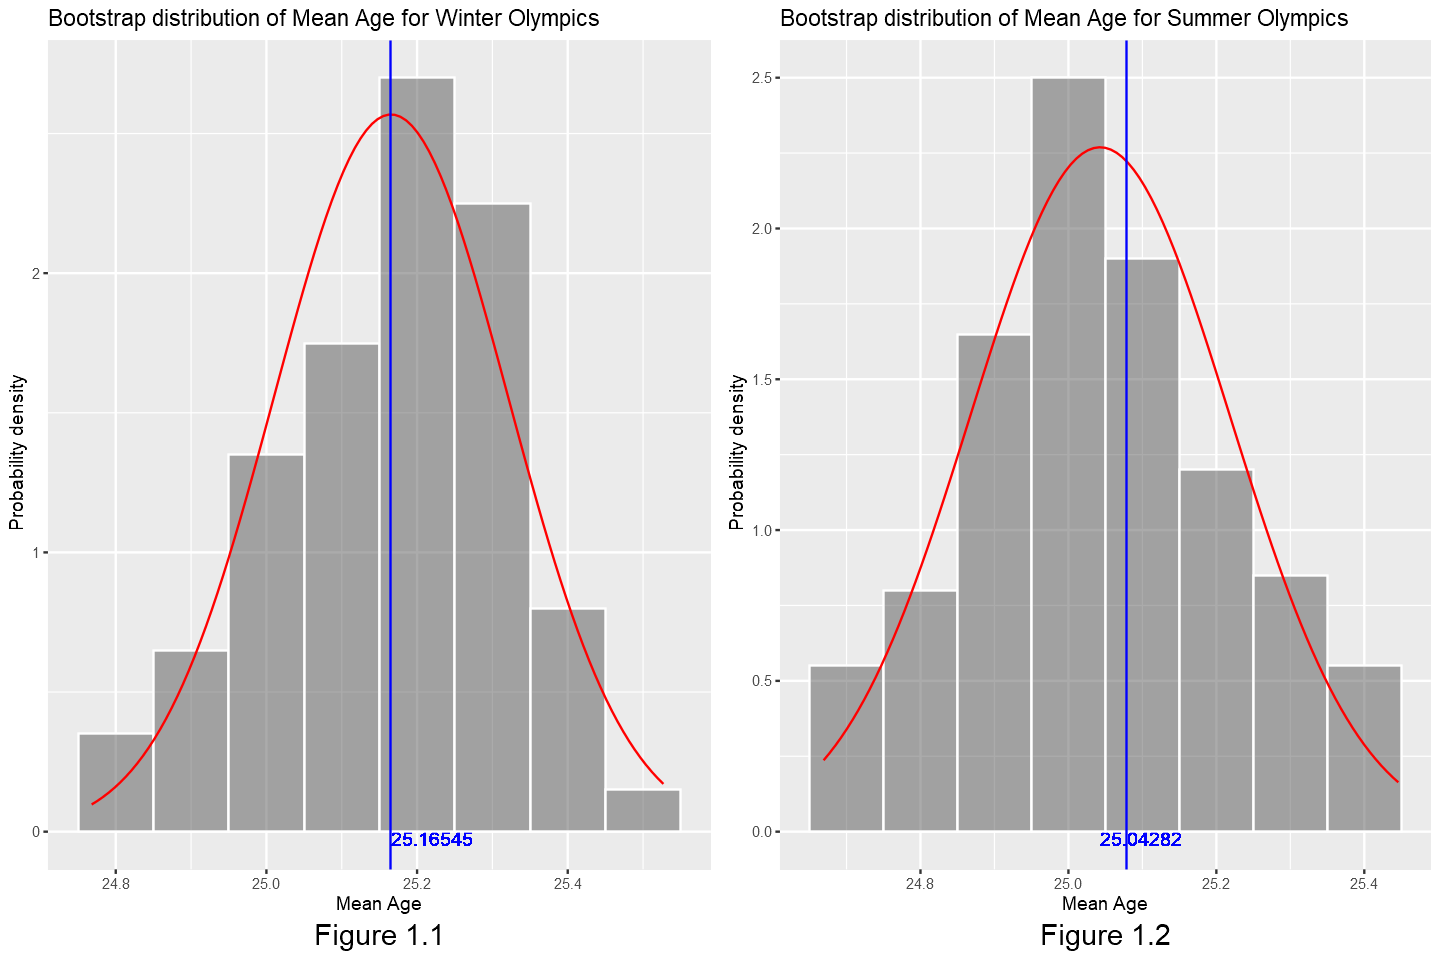

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
plot_grid(winter_hist, summer_hist)

### Hypothesis Testing

#### Simulation-based Hypothesis Testing

Let's first establish our hypotheses once again - we believe that <u>the mean age of first-time medal winners in the Winter Olympics is higher than that of the Summer Olympics</u>, that is:

$$ H_0: \mu_{\text{Summer}} =  \mu_{\text{Winter}} ~~~ \text{ vs } ~~~ H_A: \mu_{\text{Summer}} \neq \mu_{\text{Winter}} $$

We'll be performing hypothesis testing test if our observed difference in sample mean $\mu_\text{summer} - \mu_\text{winter} = 25.078 - 25.165 = -0.0867$ is due to sampling error or not. To perform our hypothesis test, we'll be performing a simulation-based hypothesis test using the `infer` package.

First, we will combine both `summer_sample` and `winter_sample` into one `combined_sample`.

In [13]:
combined_sample <- bind_rows(summer_sample, winter_sample)

We will utilize the `infer` workflow to calculate the bootstrap sample of difference in mean age between Summer and Winter Olympic under the Null Hypothesis (Distribution).

In [14]:
set.seed(42069)

null_distribution <- combined_sample %>%
    specify(Age ~ Season) %>%
    hypothesise("independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Summer", "Winter"))

Use the same workflow to calculate the observed difference in mean between Summer and Winter Olympic.

In [15]:
obs_diff_mean <- combined_sample %>%
    specify(Age ~ Season) %>%
    calculate(stat = "diff in means", order = c("Summer", "Winter"))

From here, we can get the P-value and visualize it on top of the Null Distribution.

P-value: 0.702



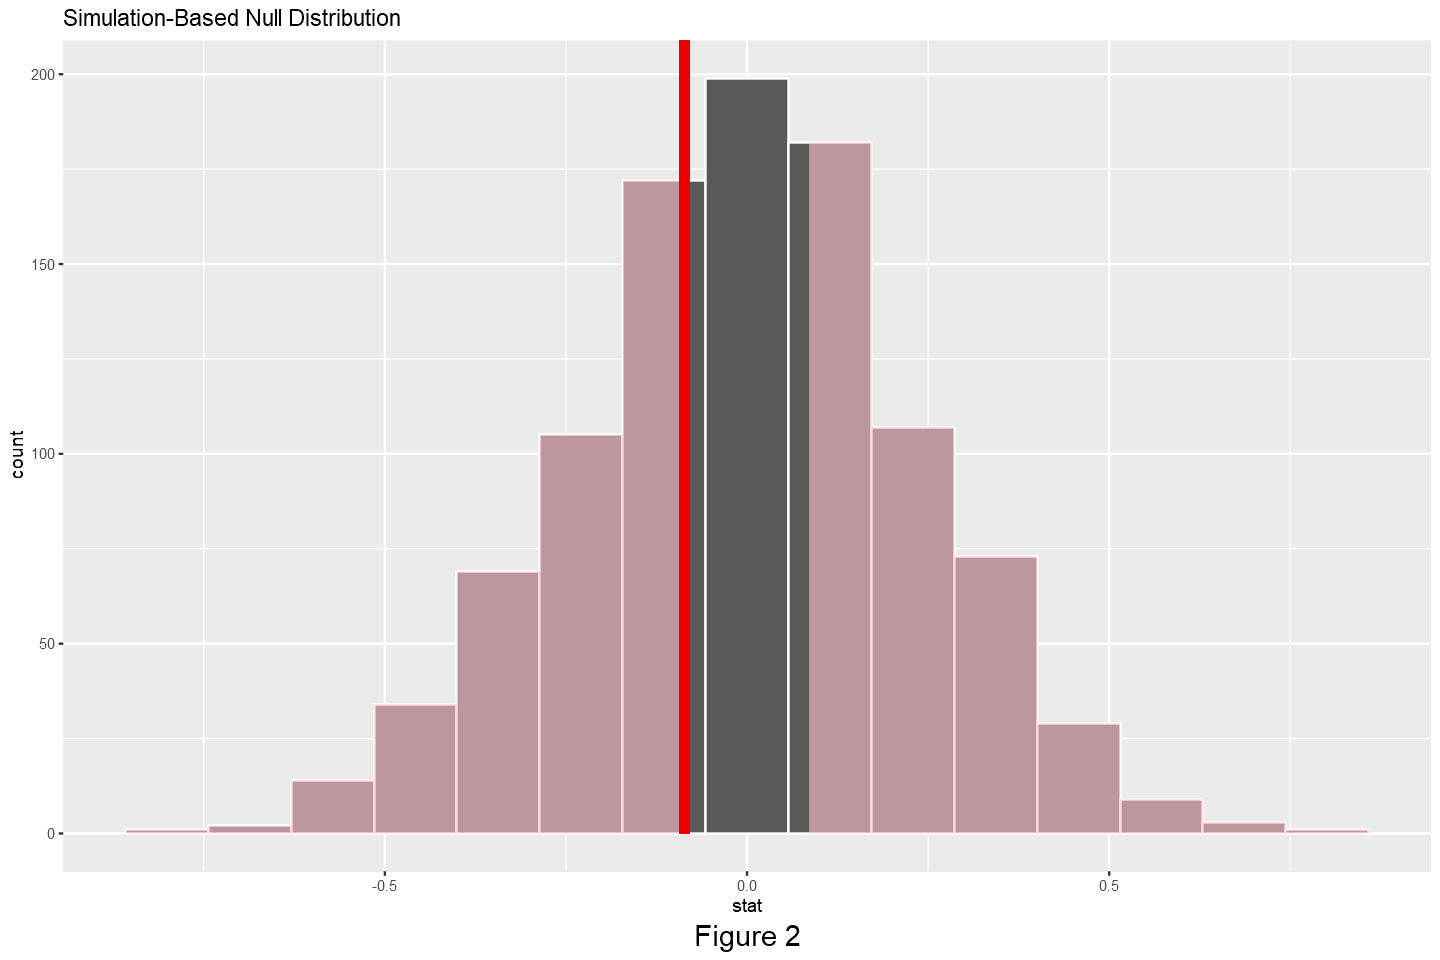

In [16]:
p_value = get_p_value(null_distribution,
                       obs_stat = obs_diff_mean,
                       direction = "both")

cat(c("P-value:", p_value$p_value))
cat("\n\n")
visualize(null_distribution) +
    shade_p_value(obs_stat = obs_diff_mean, "both") +
    labs(caption = "Figure 2") +
    theme(plot.caption = element_text(size = 17, hjust = 0.5))  # the red vertical line

And thus, we achieve a $P$-value of 0.702 from our simulation-based two-sample hypothesis test. We can interpret this value as probability of obtaining a test statistic just as extreme or more extreme than our observed test statistic **assuming the null hypothesis $H_0$ was true** (Chester et al, 2022)

#### $t-$Test (Theory-based)

Serving as a sanity-check, as well as additional evidence for our original theory-based approach to hypothesis testing, we'll also be performing a theory-based hypothesis test using the `infer` package. We will use a Welch's two-sample $t-$test based on the Student t-distribution to reflect the fact that we are comparing two means we assume to be equal by our null hypothesis. Furthermore, our code that computes our t-test also creates a confidence interval reflecting the uncertainty in the differences of the means. 

A $t-$distribution is appropriate to calculate this interval because, again, we are comparing two means that we assume are equal under our null hypothesis, and we don't know the standard deviations of these populations. Though both our sample sizes are much greater than 30 (or 50 for that matter) - which means that the difference between the $t-$distribution and Normal distribution is close to none; we are still using the $t-$distribution to make the code more generalizable to other samples that may have a smaller $n$.

This approach is consistent with our use of bootstrapped samples to compare the population means in our preliminary analysis.

In [17]:
t_test <- t.test(pull(summer_sample, Age),
                 pull(winter_sample, Age),
                 alternative = "two.sided",
                 conf.level = 0.95)

cat(c("P-value:", t_test$p.value))

P-value: 0.712421504940786

So our theory-based two-sample hypothesis test based on the $t-$distribution gave us a $p-$value of 0.712. The interpretation of the $p-$value here is similar to before, it's the probability of obtaining a test statistic just as extreme or more extreme than our observed test statistic **assuming the null hypothesis $H_0$ was true** (Chester et al, 2022)

### Confidence Interval

Next, we will compute the confidence interval to further the rigidity of our tests as well as communicate uncertainty in our answer.

# A tibble: 1 x 2
  lower_ci upper_ci
     <dbl>    <dbl>
1   -0.552    0.378

Table 7: 95% Confidence Interval




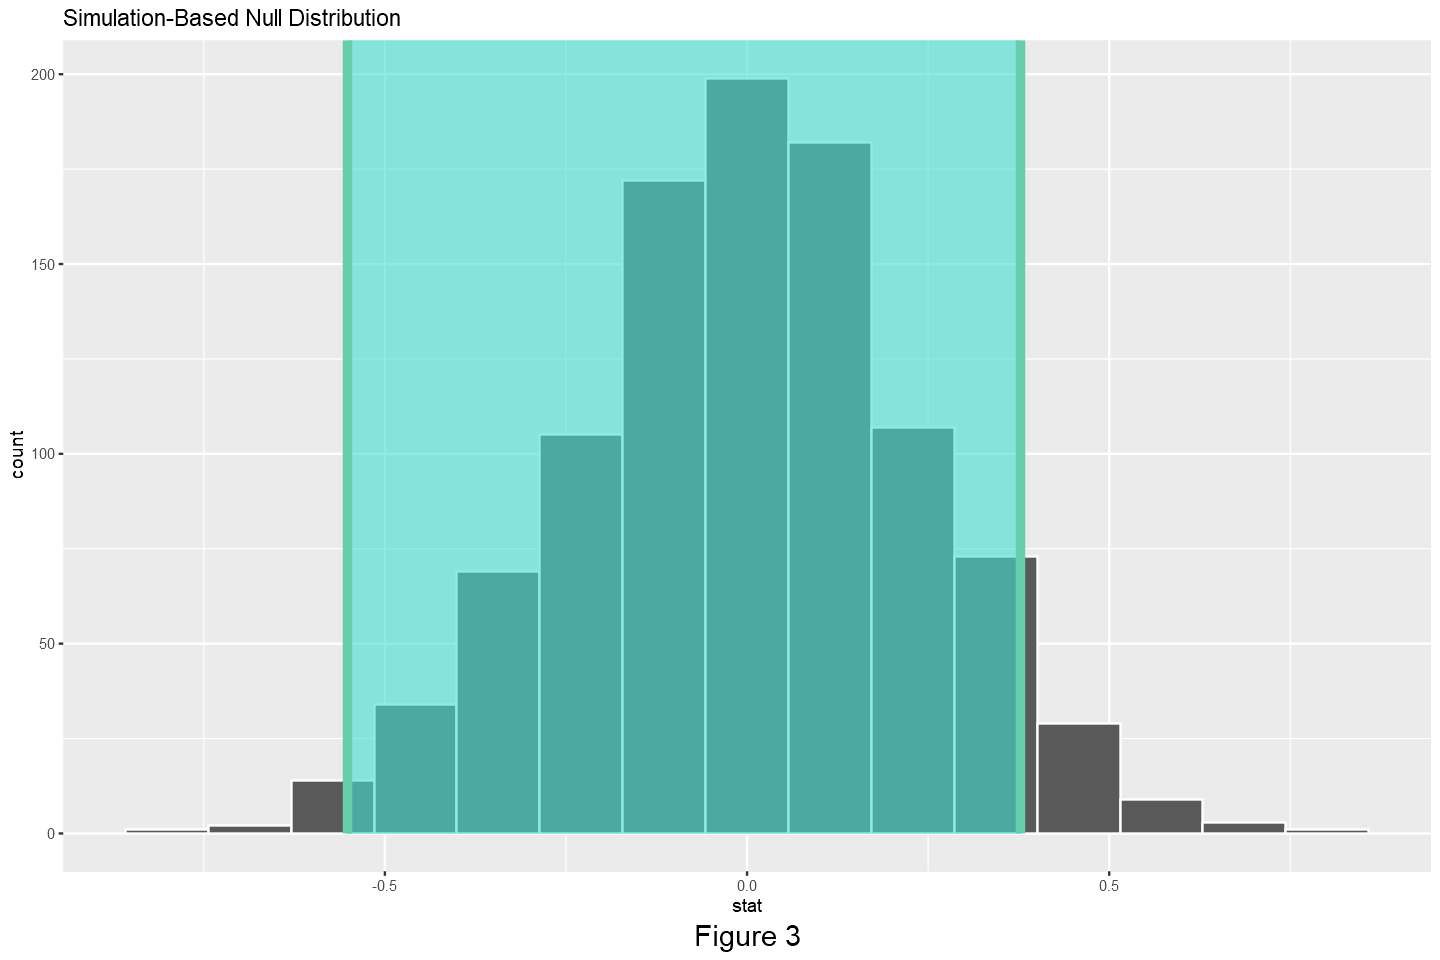

In [18]:
percentile_ci <- null_distribution %>%
    get_confidence_interval(level = 0.95,
                            point_estimate = obs_diff_mean,
                            type = "se")
    

print(percentile_ci)
cat("\nTable 7: 95% Confidence Interval\n\n\n")
visualize(null_distribution) +
    shade_ci(endpoints = percentile_ci) +
    labs(caption = "Figure 3") +
    theme(plot.caption = element_text(size = 17, hjust = 0.5)) # the blue box

We got a 95% confidence interval of $[-0.552, 0.378]$ - the visualization of the interval can is shown in Figure 3. This interval can be interpreted as such, we expect the true different in mean age for athletes between Summer Olympic and Winter Olympic will be in between the interval $[-0.552, 0.378]$ roughly 95% of the time. Furthermore, we can note that the confidence interval is very small (eg. -0.552 and 0.378 are less than a year difference in mean age), which also means that the difference in mean age is likely negligible.

# Results

We achieved a p-value of 0.72 from our simulation-based hypothesis testing. Therefore, at the 5% significance level, there is insufficient evidence to support the claim that the mean age between first-time summer and winter Olympics medal winners is the same. Thus, we fail to reject the null hypothesis. We can further confirm this via our theory-based hypothesis tests which achieved a very similar p-value score of 0.71242. This is even further supported by our confidence interval of $[-0.552, 0.378]$ which does contain the null value, $mu_0 = \mu_{\text{summer}} - \mu_{\text{winter}} = 0$ - refer to Figure 3 and Table 7. Furthermore, we can note that the confidence interval is very small (eg. -0.552 and 0.378 are less than a year difference in mean age), which also means that the difference in mean age is likely negligible.

Regarding the question about **bootstrap vs asymptotics**: unfortunately, we cannot calculate the exact coverage probability since we do not have access to the population - but the textbook (Chester et al, 2022) states that the theory-based approach will give us a narrower confidence interval than it should. This leads us to assume that the bootstrapping approach is better than the asymptotic approach because the bootstrapping method creates an actual distribution (see Figure 1.1 and 1.2) that we can sample and create confidence intervals from. This is in contrast to the asymptotic approach, which uses the CLT as a way to assume the distribution shape of our data. Additionally, research found that "all confidence intervals perform satisfactorily for large samples, while bootstrap performs better in smaller samples in terms of coverage and width" (Perera, 2008). So to keep our experiment sample-size-agnostic, we would put more trust into the simulation-based approach.

This report is trustworthy because in pre-processing, we exclusively included examples that fit the criteria of our research question, i.e athletes that have won medals and whose ages are known. Our sample was conducted randomly (see Table 3.1, 3.2 and their code), meaning it is representative of the Olympian population. Finally, the report is trustworthy because it concedes that there is uncertainty in our calculated mean ages - and since the confidence narrow is narrow, we are not very uncertainty about our answer.

Our sampling distribution plots and point estimates are not sufficient to take to stakeholders because they do not illustrate the uncertainty in our calculations. We plan to calculate 95% confidence intervals of the mean age of first-time Olympic medalists in the Summer and Winter Olympics to take the sampling variation into account, and to conduct a $t$-test to see if the true average ages between the games are different.

#  Discussion and Conclusion

Our results were unexpected because they did not match our initial prediction, which was that the mean age between first-time Olympic medalists would be different when comparing Summer athletes to Winter athletes, with a skew towards older Winter athletes due to their developed long-term skill level. Our results contradicted our prediction because the **mean age was the same**. This indicates that there is an overall peak age for performance at the international Olympic level, regardless of the sport's season. This conclusion supported by our data is advantageous to the athletic world because it will allow both coaches and athletes to optimize their Olympic training and preparations using the athlete’s biological strengths. Furthermore, this could lead to future subsets of research regarding specific peak performance ages for different sexes, or for different sports. This would create a resource for coaches and athletes alike to make a training plan that tailors to the athlete’s abilities. 

Regarding reliability, we were careful not to $p-$hack - the act of only reporting a favourable $p-$value that supports the desired claim (Wasserstein & Lazar, 2016). We did our best to avoid $p-$hacking by utilizing and communicating both the confidence value and p-values (which were conducted using 2 different approaches) to report both our findings as well as our confidence and uncertainty.

Finally, this research is beneficial to data scientists because it inspires more careful data collection that reflects recency. There are many applications that can come from datasets such as ours, but it is important to always be critical to constantly improve future data collection. For instance, in our data set, there were some notable athletes missing (eg: Usain Bolt). This indicates that the dataset does not showcase every single athlete from both Olympics, which it had claimed to do. Secondly, the dataset only shows data up until 2016 - it’s recent, but it could be more up-to-date as there have been 3 Olympics since then. Identifying these limitations encourages improvements for future collections and studies, and allows the data science community to progress as a whole.

# References

Apollaro, G., Rodríguez, Y. Q., Herrera-Valenzuela, T., Hernández-Mendo, A., & Falcó, C. (2022, January 27). Relative and chronological age in successful athletes at the World Taekwondo Championships (1997–2019): A focus on the behaviour of multiple medallists. MDPI. Retrieved March 1, 2022, from https://doi.org/10.3390/ijerph19031425 

Chester Ismay and Albert Y. Kim Foreword by Kelly S. McConville. (2022, January 21). Statistical Inference via data science. Statistical Inference via Data Science. Retrieved March 30, 2022, from https://moderndive.com/index.html 

Ford, P. R., & Williams, M. A. (2013, January 23). No relative age effect in the birth dates of award-winning athletes in male professional team sports. Taylor & Francis. Retrieved March 1, 2022, from https://www.tandfonline.com/doi/abs/10.1080/02701367.2011.10599790 

John Horne, G. W. (2016, May 26). Understanding the Olympics: Second edition. Taylor & Francis. Retrieved March 1, 2022, from https://www.taylorfrancis.com/books/mono/10.4324/9781315712529/understanding-olympics-john-horne-garry-whannel 

Perera, S. (2008, October 20). Normal theory and bootstrap confidence interval estimation in assessing diagnostic performance gain when combining two diagnostic tests. Taylor & Francis. Retrieved April 4, 2022, from https://www.tandfonline.com/doi/abs/10.1080/03610910802318374?journalCode=lssp20 

Wasserstein, R. L., & Lazar, N. A. (2016, June 9). The ASA statement on P-values: Context, Process, and Purpose. Taylor & Francis. Retrieved April 4, 2022, from https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.YlCaZzdufPb 
